In [1]:
import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
import delfi.utils.io as io
import delfi.summarystats as ds
import lfimodels.glm.utils as utils
import matplotlib.pyplot as plt
import numpy as np

from lfimodels.glm.GLM import GLM
from lfimodels.glm.GLMStats import GLMStats
from delfi.utils.viz import plot_pdf

%matplotlib inline

seed = 42
m = GLM(seed=seed)
p = utils.smoothing_prior(n_params=m.n_params, seed=seed)
s = GLMStats(n_summary=m.n_params)
g = dg.Default(model=m, prior=p, summary=s)

true_params, labels_params = utils.obs_params()
obs = utils.obs_data(true_params, seed=seed)
obs_stats = utils.obs_stats(true_params, seed=seed)

rerun = False  # if False, will try loading file from disk

try:
    assert rerun == False, 'rerun requested'
    sam = np.load('sam.npz')['arr_0']
except:
    sam = utils.pg_mcmc(true_params, obs)
    np.savez('sam.npz', sam)
    
seed = 99
g = dg.Default(model=m, prior=p, summary=s)
res = infer.SNPE(g, 
                 obs=obs_stats, 
                 n_hiddens=[50], 
                 seed=seed, 
                 pilot_samples=1000,
                 svi=True,
                 reg_lambda=0.01,
                 prior_norm=False)

logs, tds, posteriors = res.run(n_train=5000, 
                                n_rounds=5, 
                                minibatch=100, 
                                epochs=1000, 
                                round_cl=3)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


## SNPE

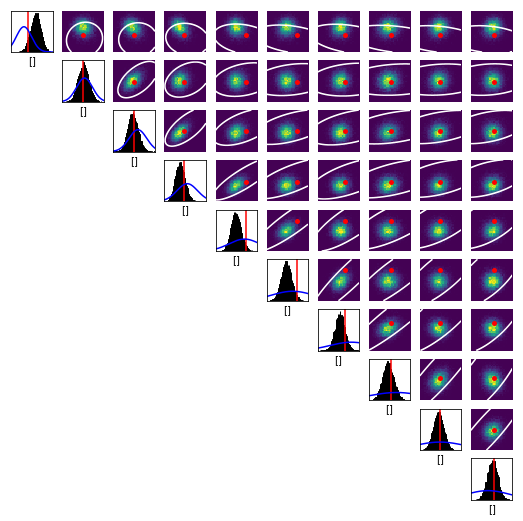

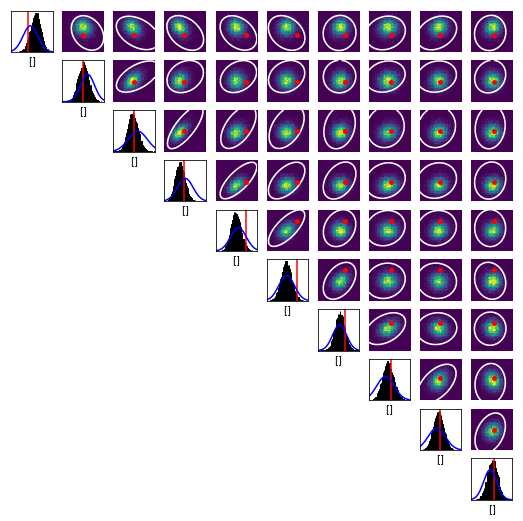

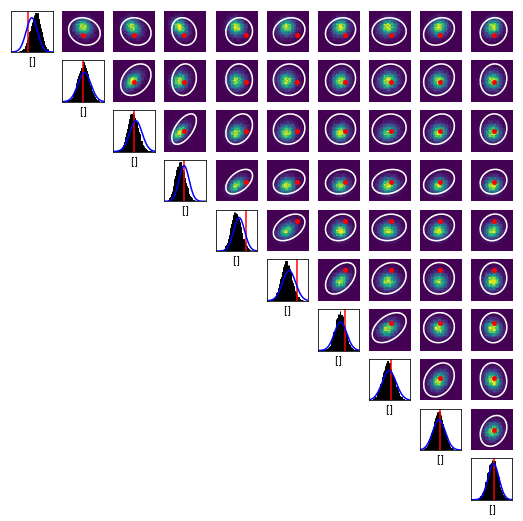

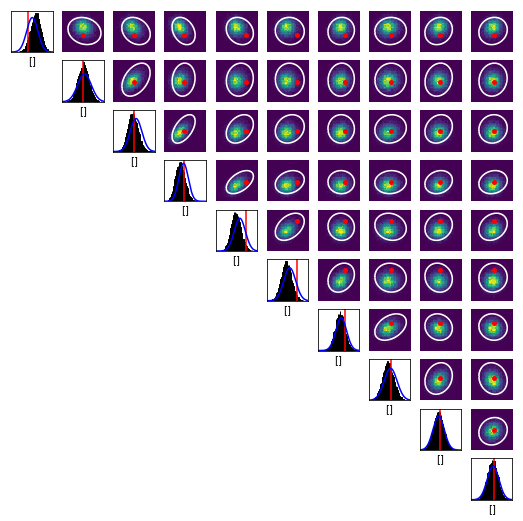

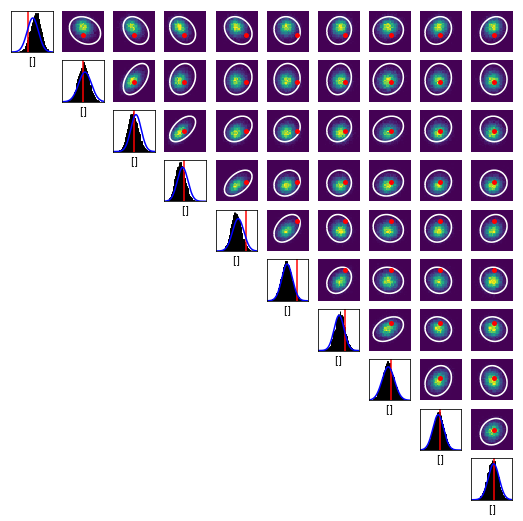

In [3]:
for r in range(5):
    posterior = posteriors[r]
    plot_pdf(posterior.xs[0], 
             lims=[-2,2], 
             samples=sam, 
             gt=true_params, 
             figsize=(9,9));

In [9]:
"""
# save results
posterior = posteriors[-1]
import pickle
with open('/home/jm/Mackelab/team/Write/Manuscripts/2017_NIPS_NeuralModelInference/figs/glm_posterior.pkl','wb') as handle:
    pickle.dump(posterior, handle)
"""

## CDELFI

In [1]:
import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
import delfi.utils.io as io
import delfi.summarystats as ds
import lfimodels.glm.utils as utils
import matplotlib.pyplot as plt
import numpy as np

from lfimodels.glm.GLM import GLM
from lfimodels.glm.GLMStats import GLMStats
from delfi.utils.viz import plot_pdf

%matplotlib inline

seed = 42
m = GLM(seed=seed)
p = utils.smoothing_prior(n_params=m.n_params, seed=seed)
s = GLMStats(n_summary=m.n_params)
g = dg.Default(model=m, prior=p, summary=s)

true_params, labels_params = utils.obs_params()
obs = utils.obs_data(true_params, seed=seed)
obs_stats = utils.obs_stats(true_params, seed=seed)

rerun = False  # if False, will try loading file from disk

try:
    assert rerun == False, 'rerun requested'
    sam = np.load('sam.npz')['arr_0']
except:
    sam = utils.pg_mcmc(true_params, obs)
    np.savez('sam.npz', sam)
    
seed = 99
g = dg.Default(model=m, prior=p, summary=s)
res = infer.CDELFI(g, 
                   obs=obs_stats, 
                   n_hiddens=[50], 
                   seed=seed, 
                   pilot_samples=1000,
                   svi=True,
                   reg_lambda=0.01,
                   prior_norm=False)

logs, tds, posteriors = res.run(n_train=5000, 
                                n_rounds=5, 
                                minibatch=100, 
                                epochs=1000)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


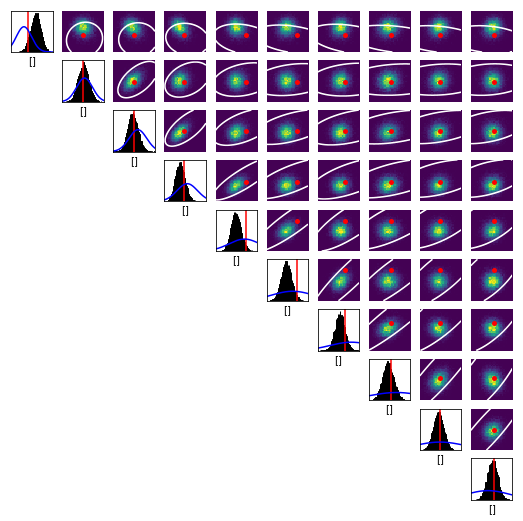

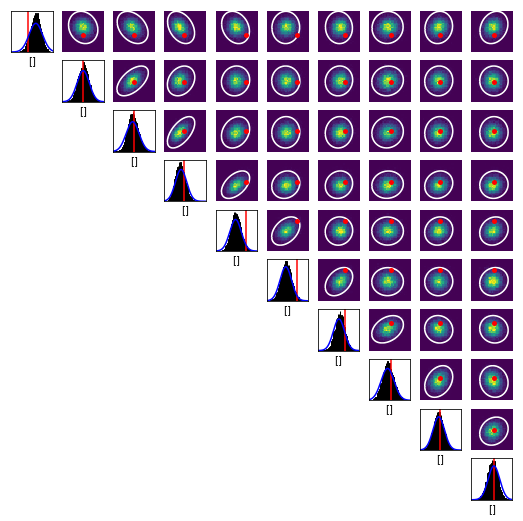

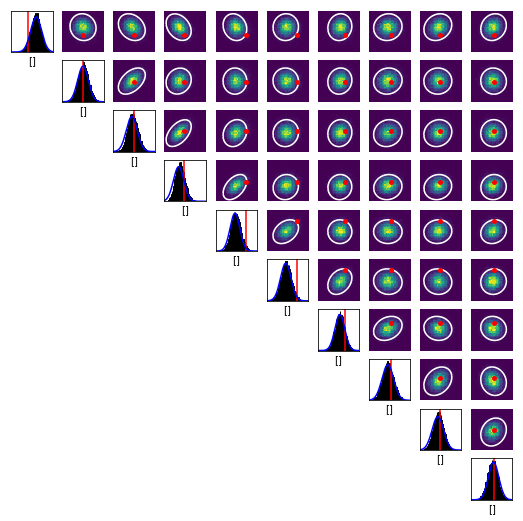

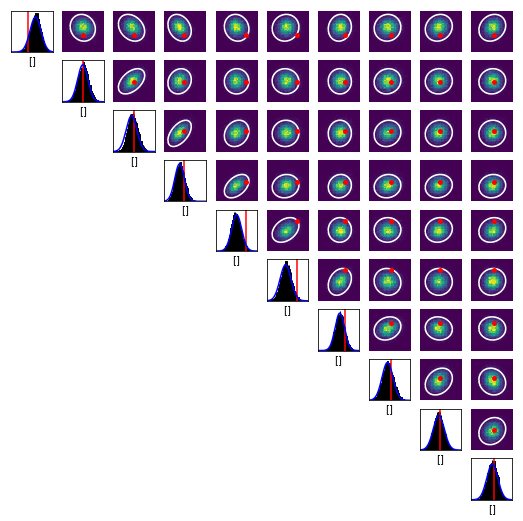

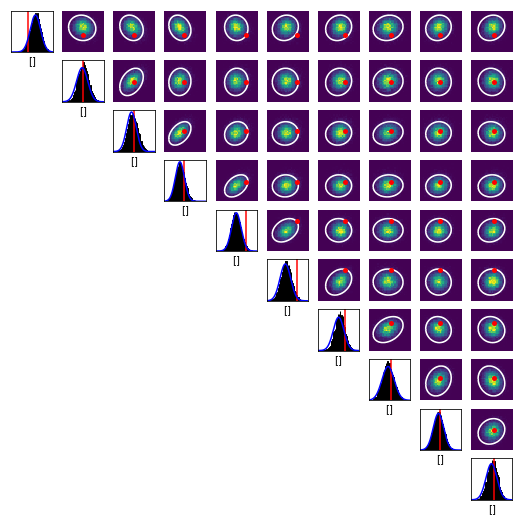

In [2]:
for r in range(5):
    posterior = posteriors[r]
    plot_pdf(posterior.xs[0], 
             lims=[-2,2], 
             samples=sam, 
             gt=true_params, 
             figsize=(9,9));

In [3]:
"""
# save posteriors
posterior = posteriors[-1]
import pickle
with open('/home/jm/Mackelab/team/Write/Manuscripts/2017_NIPS_NeuralModelInference/figs/glm_posterior_cdelfi.pkl','wb') as handle:
    pickle.dump(posterior, handle)
"""

## Version info

In [11]:
!cd /home/jm/repos/delfi/; git rev-parse origin/master

d3966254abdce44f401c2d5ff169e005534323b6


In [12]:
!cd /home/jm/repos/lfi-models/; git rev-parse origin/master

0b4ac370e991439298aef7f176478ffc6eab3f31


In [13]:
import matplotlib
matplotlib.__version__

'2.1.0'